# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

## TODO
1. some trajectories may not start on the boundaries. Remove those
2. some local transformations may fail. Check the validity of the first row after transformation

In [27]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2"

# dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [28]:
exec(open('init_notebook.py').read())

FileNotFoundError: [Errno 2] No such file or directory: 'init_notebook.py'

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [36]:
# sceneId = 30
# date = "2022-12-22"
# fps=5
# minYDisplacement = 6.5
# maxXDisplacement = 6
sceneId = 240
date = "2023-05-04"
fps=10
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [37]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps=fps
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [38]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,3208,18061,240,6.0,-0.026381,2.882353,0.171520,0.800383,-0.045989,0.044870
1,18,3210,18061,240,6.0,-0.063628,2.724335,0.186239,0.790090,-0.073597,0.051462
2,18,3212,18061,240,6.0,-0.103918,2.568007,0.201445,0.781639,-0.076030,0.042259
3,18,3214,18061,240,6.0,-0.147248,2.413341,0.216651,0.773328,-0.076027,0.041552
4,18,3216,18061,240,6.0,-0.193228,2.259880,0.229901,0.767307,-0.066252,0.030105


In [39]:
transformer.deriveAxisVelocities(pedDf)
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,3208,18061,240,6.0,-0.026381,2.882353,0.372479,1.580181,-0.045989,0.044870
1,18,3210,18061,240,6.0,-0.063628,2.724335,0.372479,1.580181,-0.073597,0.051462
2,18,3212,18061,240,6.0,-0.103918,2.568007,0.402891,1.563278,-0.076030,0.042259
3,18,3214,18061,240,6.0,-0.147248,2.413341,0.433301,1.546657,-0.076027,0.041552
4,18,3216,18061,240,6.0,-0.193228,2.259880,0.459802,1.534615,-0.066252,0.030105


In [8]:
# print(pedDf["uniqueTrackId"].unique())

In [9]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,10101.000000,10101.000000,1.010100e+04,10101.0,10101.0,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000
mean,23.630136,15135.703000,3.477053e+04,30.0,6.0,0.991606,-0.032858,0.100327,0.317271,0.011289,0.005482,1.353710,1.023131,2.960637
std,3.290704,9111.209043,1.540991e+05,0.0,0.0,1.662722,1.798876,0.472434,1.253404,0.258232,0.244386,0.268775,0.902215,1.795835
min,18.000000,10.000000,1.800400e+04,30.0,6.0,-7.277186,-3.346550,-1.607051,-2.134521,-2.374641,-2.400890,0.072169,0.000000,0.000000
25%,21.000000,6873.000000,2.131700e+04,30.0,6.0,0.172404,-1.581260,-0.317664,-1.185595,-0.110881,-0.128109,1.200569,0.361141,1.410430
50%,24.000000,15556.000000,2.416500e+04,30.0,6.0,1.266219,-0.034317,0.217503,1.021115,0.009763,0.002257,1.378066,0.834786,2.938032
75%,26.000000,22500.000000,2.646800e+04,30.0,6.0,1.989585,1.500205,0.428319,1.364186,0.133793,0.135859,1.539923,1.427622,4.505525
max,29.000000,32086.000000,2.219001e+06,30.0,6.0,7.233725,3.299485,1.582621,2.039234,1.785514,1.799100,2.223081,6.813151,6.265718


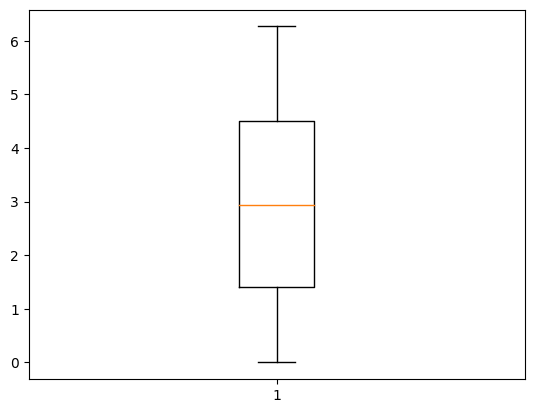

{'whiskers': [<matplotlib.lines.Line2D at 0x211626eef10>,
 'caps': [<matplotlib.lines.Line2D at 0x211627008b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21162700f40>],
 'medians': [<matplotlib.lines.Line2D at 0x21162704730>],
 'fliers': [<matplotlib.lines.Line2D at 0x21162704c70>],
 'means': []}

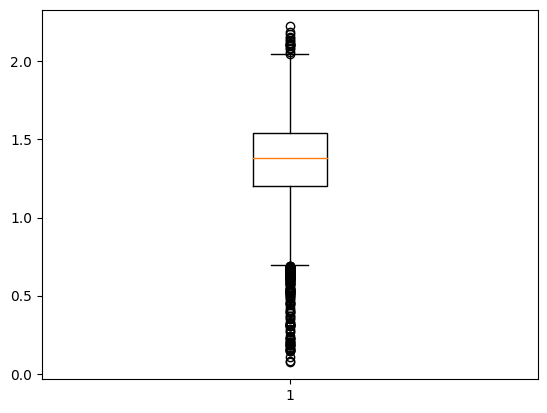

In [10]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [11]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
# outliers.index

In [12]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
# outliers

In [13]:
# outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [14]:
# ped19019 = pedDf[pedDf["uniqueTrackId"] == 19019]
# firstRow = ped19019.iloc[0]
# firstRow

In [15]:
# dX, dY = transformer.translateOneToLocalSource(ped19019)
# print(list(zip(dX, dY)))

In [16]:
# ped19019.tail()

In [17]:
# print(len(outliers), 'vs', len(pedDf["uniqueTrackId"].unique()))

In [18]:
# outliers = cleaner.getOutliersByXDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [19]:
# cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)
# cleanPedDf2 = cleaner.cleanBySpeed(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

using min Y displacement (6.5)


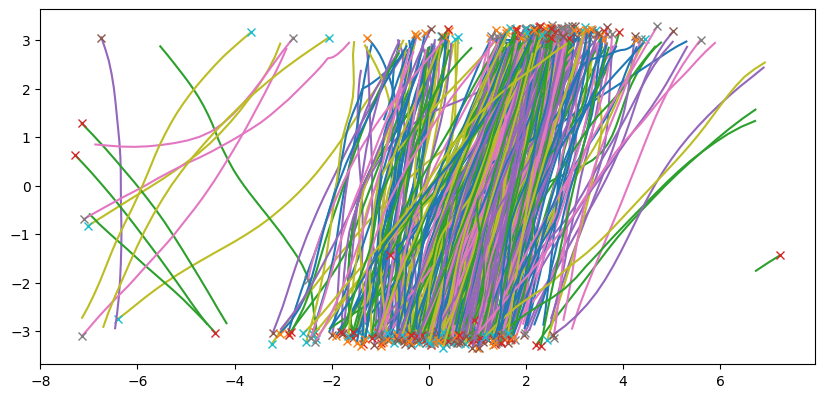

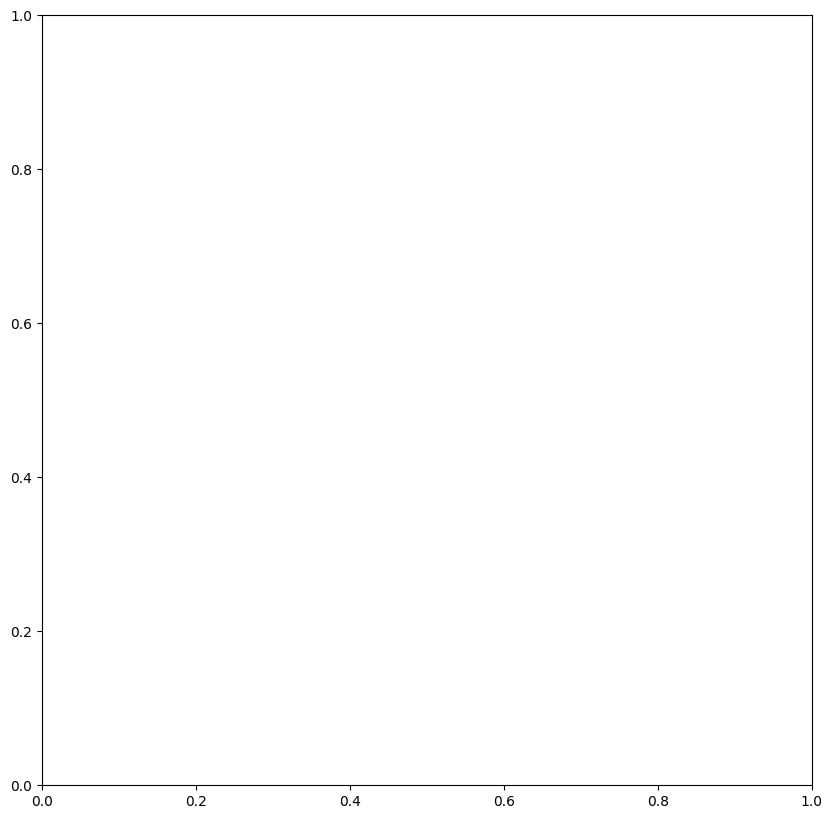

In [20]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY', trackIds=[19019])
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [21]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())

In [22]:
transformer.translateAllToLocalSource(cleanPedDf)

ValueError: No objects to concatenate

In [ ]:
cleanPedDf.head()

In [ ]:
# trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"]==allPedIds[0]]
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# transformer.rotate(trackDf)
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
tracksMeta.head()

In [ ]:
# southIds = []
# for pedId in allPedIds:
#     trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
#     trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
#     # print(trackMeta['verticalDirection'])
#     if trackMeta['verticalDirection'] == "SOUTH":
#         southIds.append(pedId)
#         # print(trackMeta["uniqueTrackId"])
#         X, Y = transformer.rotate180(trackDf, xCol=transformer.localXCol, yCol=transformer.localYCol)
#         cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
#         cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y

# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
# southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
# visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
# visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

# IndTransformer

In [ ]:
from ind_tools.IndTransformer import IndTransformer
indTransformer = IndTransformer(colMapper)

In [ ]:
# southIds, newPedDf = indTransformer.convertLocalToNorth(cleanPedDf, tracksMeta)
southIds, newPedDf = indTransformer.convertLocalToNorth(cleanPedDf, None) # rebuilds meta

In [ ]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
visualizer.show(newPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
# southIds, newPedDf = indTransformer.convertSceneTracksToNorth(cleanPedDf, tracksMeta)
southIds, newPedDf = indTransformer.convertSceneTracksToNorth(cleanPedDf, None)  # rebuilds meta
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(newPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

# Analyzers

In [ ]:
import seaborn as sns
from tti_dataset_tools.InfluenceAnalyzer import InfluenceAnalyzer
influenceAnz = InfluenceAnalyzer(colMapper)

In [ ]:
dfH = influenceAnz.getInfluenceHeatMap(southPeds, (20,10))

In [ ]:
# plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)

# ax = sns.heatmap(dfH,
#             cmap='icefire',
#             xticklabels=100,
#             yticklabels=10)

# plt.xlabel('X',fontsize=22)
# plt.ylabel('Y',fontsize=22)
# ax.invert_yaxis()

In [ ]:
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

ax = sns.heatmap(dfH,
            cmap='Spectral',
            xticklabels=100,
            yticklabels=10)

plt.xlabel('X',fontsize=22)
plt.ylabel('Y',fontsize=22)
ax.invert_yaxis()

In [ ]:
dfH = influenceAnz.getInfluenceHeatMap(northPeds, (20,10))
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

ax = sns.heatmap(dfH,
            cmap='Spectral',
            xticklabels=100,
            yticklabels=10)

plt.xlabel('X',fontsize=22)
plt.ylabel('Y',fontsize=22)
ax.invert_yaxis()